In [1]:

import numpy as np
import cv2





#list of data augmentation techniques applied to characters 


def add_light(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")

    image=cv2.LUT(image, table)
    return image



def add_light_color(image, color, gamma=1.0):
    invGamma = 1.0 / gamma
    image = (color - image)
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")

    image=cv2.LUT(image, table)
    return image



def saturation_image(image,saturation):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    v = image[:, :, 2]
    v = np.where(v <= 255 - saturation, v + saturation, 255)
    image[:, :, 2] = v

    image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    return image

def gausian_blur(image,blur):
    image = cv2.GaussianBlur(image,(5,5),blur)
    return image


def bileteralBlur(image,d,color,space):
    image = cv2.bilateralFilter(image, d,color,space)
    return image

#erodes away the boundary makes thinner
def erosion_image(image,shift):
    kernel = np.ones((shift,shift),np.uint8)
    image = cv2.erode(image,kernel,iterations = 1)
    return image

#difference between erosion and dilation
def morphological_gradient_image(image, shift):
    kernel = np.ones((shift, shift), np.uint8)
    image = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)
    return image



def top_hat_image(image, shift):
    kernel = np.ones((shift, shift), np.uint8)
    image = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)
    return image
    
    
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    image = cv2.filter2D(image, -1, kernel)
    return image
    
    
def edge_image(image,ksize):
    image = cv2.Sobel(image,cv2.CV_16U,1,0,ksize=ksize)
    return image


def addeptive_gaussian_noise(image):
    h,s,v=cv2.split(image)
    s = cv2.adaptiveThreshold(s, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    h = cv2.adaptiveThreshold(h, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    v = cv2.adaptiveThreshold(v, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    image=cv2.merge([h,s,v])
    return image


def contrast_image(image,contrast):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    image[:,:,2] = [[max(pixel - contrast, 0) if pixel < 190 else min(pixel + contrast, 255) for pixel in row] for row in image[:,:,2]]
    image= cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    return image


def translation_image(image,x,y):
    rows, cols ,c= image.shape
    M = np.float32([[1, 0, x], [0, 1, y]])
    image = cv2.warpAffine(image, M, (cols, rows))
    return image



def rotate_image(image,deg):
    rows, cols,c = image.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2), deg, 1)
    image = cv2.warpAffine(image, M, (cols, rows))
    return image

In [2]:
image=cv2.imread(r'D:\by_class\test\Z\hsf_0_00021.png')

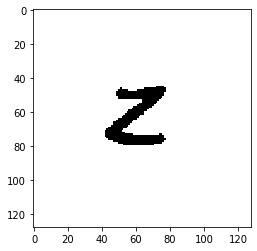

In [3]:
import matplotlib.pyplot as plt
plt.imshow(add_light(image, gamma=0.9))

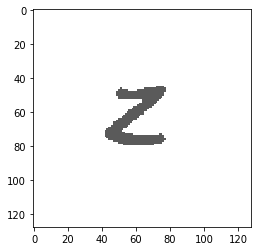

In [4]:
plt.imshow(saturation_image(image,90))

In [5]:
def hue_image(image,saturation):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    v = image[:, :, 2]
    v = np.where(v <= 255 + saturation, v - saturation, 255)
    image[:, :, 2] = v

    image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    
    return image



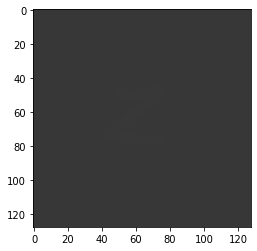

In [6]:
plt.imshow(hue_image(image,200
                    ))

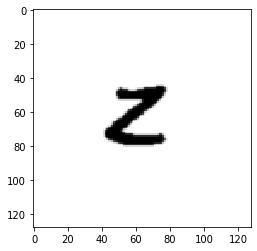

In [7]:
plt.imshow(gausian_blur(image,0.6))

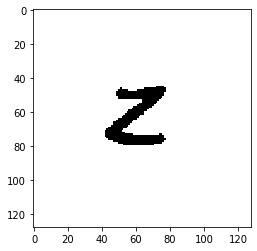

In [8]:
plt.imshow(bileteralBlur(image,25,150,150))

In [9]:
def erosion_image(image,shift):
    kernel = np.ones((shift,shift),np.uint8)
    image = cv2.erode(image,kernel,iterations = 1)
    return image

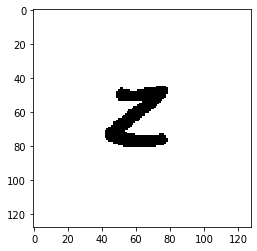

In [10]:
plt.imshow(erosion_image(image,2))

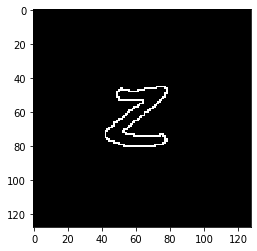

In [11]:
plt.imshow(morphological_gradient_image(image,2))

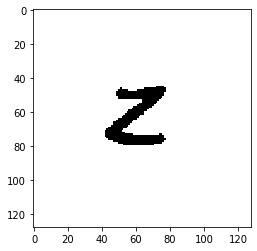

In [12]:
plt.imshow(top_hat_image(image,600))

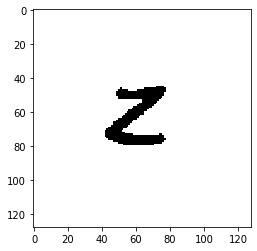

In [13]:
plt.imshow(sharpen_image(image))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


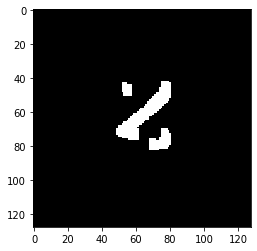

In [14]:
plt.imshow(edge_image(image,7))


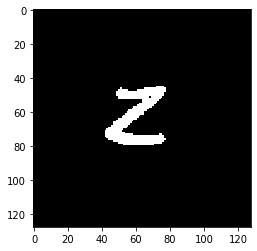

In [15]:
plt.imshow(addeptive_gaussian_noise(image))

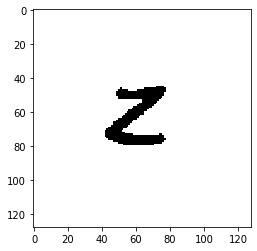

In [16]:
plt.imshow(contrast_image(image,200))

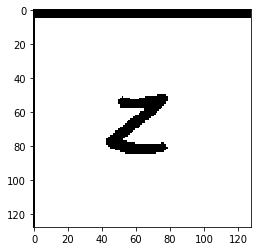

In [17]:
plt.imshow(translation_image(image,1,5))

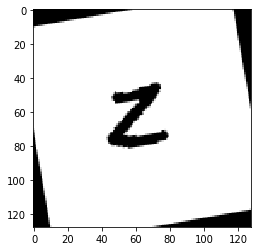

In [18]:
plt.imshow(rotate_image(image,10))

In [106]:
folders=os.listdir(r'D:\anpr2\Training Data')

In [118]:
import os
data_dir=r'D:\anpr2\Training Data'
for folder in folders:
    image_dir=os.path.join(data_dir,folder)
    i=1300
    for image in os.listdir(image_dir):
        imge_path=os.path.join(image_dir,image)
        im=cv2.imread(imge_path)
        im=add_light(im, gamma=0.9)
        im=saturation_image(im,90)
        im=contrast_image(im,200)
        #im=sharpen_image(im)
        #im=bileteralBlur(im,25,150,150)
        #im=gausian_blur(im,0.6)
        im=translation_image(im,1,5)
        
        cv2.imwrite(os.path.join(image_dir,str(i)+'.jpg'),im)
        i+=1
        
        